*Page and Latex Commands*
$\newcommand{\C}{\mathbb{C}}
\renewcommand{\R}{\mathbb{R}}
\renewcommand{\Z}{\mathbb{Z}}
\renewcommand{\N}{\mathbb{N}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\mP}{\mathcal{P}}
\newcommand{\bp}{\begin{pmatrix}}
\newcommand{\ep}{\end{pmatrix}}
$

In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import sys

# Self Defined Functions
sys.path.append('..\lib')

from findiff import *
from opt import *
from krot import *

# Kantorovich-Rubenstein OT as Finite Difference Methods

**Problem Statement**

Provided initial mass distribution $\rho$ and final mass distribution $\sigma$ over a compact metric space $X$, along with the gradient of the cost function for each point in the space $\nabla c : x\in X \rightarrow \R^+$ find the function which minimizes the following integral equation

$$\begin{align} \min_\phi \quad & \int_X \phi(x)\left(\rho(x)-\sigma(x)\right) \\
                \text{s.t.}\quad & |\nabla \phi(x)|\leq |\nabla c(x)|,\quad \forall x\in X \end{align}$$


*Lagrangian*

The Lagrangian is formed by taking $\lambda\in \R^n_+$ to be the Lagrange multplier for the above constraing. The augmented Lagrangian is given by the following integral equation.

$$\begin{align} \min_\phi \quad & \int_X \phi(x)\left(\rho(x)-\sigma(x)\right) + \lambda(x)\left( |\nabla c(x)|-| \nabla \phi(x)|\right) \\
                \text{s.t.}\quad &\lambda(x)\left( |\nabla c(x)|-| \nabla \phi(x)|\right)=0 \quad \forall x\in X \end{align}$$
                
*Euler Equations*

The Euler Equations for the above problem are given by the following variable coefficient elliptic PDE.

$$\begin{align} &\nabla \cdot \left( \frac{\lambda}{|\nabla \phi|}\nabla \phi \right) = \sigma-\rho \\
                \text{s.t.}\quad & \frac{\partial\phi}{\partial n}=0 \quad \forall x\in\partial X \end{align}$$

## One Dimensional Transport

### Example 1: Simple Transportation

In the one dimensional case the following properties hold from the above optimization problem.

In [2]:
n = 20*6 #Number of Interior Points
h=1/(n-1) #Step Size
x = np.linspace(0,1,n) #All 1D Examples may be expressed on the linesegment 0-1

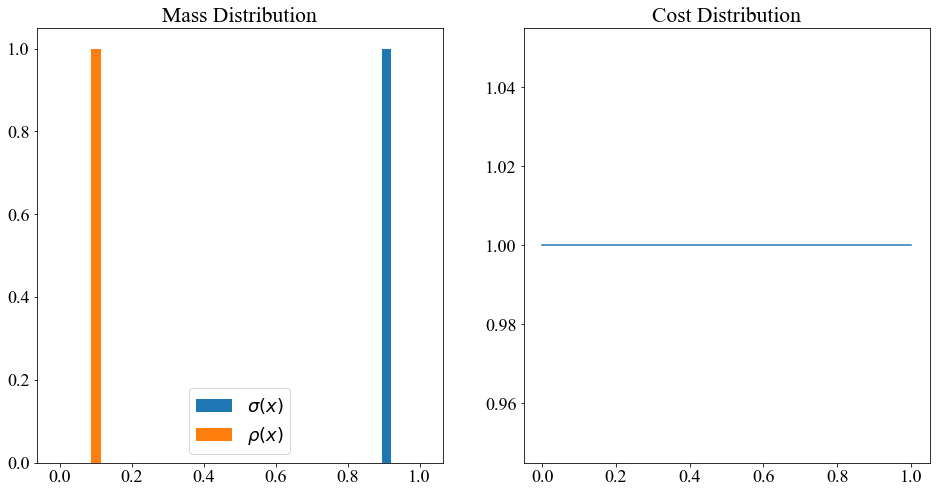

In [3]:
# Initial Distribution
rho= np.zeros(n)
rho[n//10] = 1

# Final Distribution
sigma = np.zeros(n)
sigma[9*n // 10] = 1

# Cost Function
Gc = np.ones(n)

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.bar(x,sigma, width = 3*h, label='$\sigma(x)$')
plt.bar(x,rho, width = 3*h, label='$\\rho(x)$')
plt.legend()
plt.title('Mass Distribution')
plt.subplot(122)
plt.plot(x,Gc)
plt.title('Cost Distribution')
plt.show()

In [4]:
f = sigma-rho
D = D1FE(n, bc = 'Neumann', matrix=True)
lam_t = cp.Variable(n)
prob = cp.Problem(cp.Minimize(cp.sum_squares(D.T@lam_t-f)))
prob.solve()

4.767844973579693e-27

In [5]:
lam = abs(lam_t.value)
Gphi = np.array([np.sign(np.round(lam_t.value[i],2))*Gc[i] for i in range(n)])
phi = cp.Variable(n)
prob = cp.Problem(cp.Minimize(cp.sum_squares(D@phi-Gphi)))
prob.solve()

6.96994124527236e-24

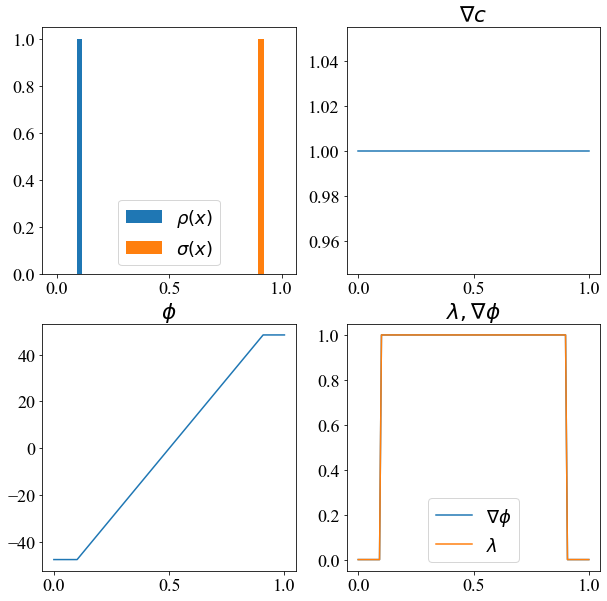

In [6]:
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.subplot(221)
plt.bar(x,rho, width = 3*h, label='$\\rho(x)$')
plt.bar(x,sigma, width = 3*h, label='$\sigma(x)$')
plt.legend()
plt.subplot(222)
plt.plot(x,Gc)
plt.title("$\\nabla c$")
plt.subplot(223)
plt.plot(x,phi.value)
plt.title("$\phi$")
plt.subplot(224)
plt.plot(x,D@phi.value, label="$\\nabla \phi$")
plt.plot(x,lam,label="$\\lambda$")
plt.title("$\\lambda, \\nabla \phi$")
plt.legend()
plt.show()

### Example 2 : Cost Regions

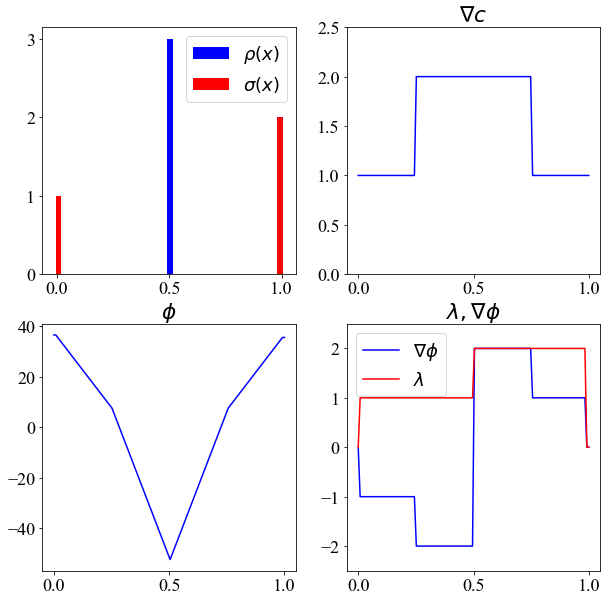

In [7]:
n = 20*6 #Number of Interior Points

h=1/(n-1)
x = np.linspace(0,1,n)

#RHS Function
rho,rho[n//2]=np.zeros(n),3
sigma,sigma[1],sigma[n-2] = np.zeros(n),1,2

Gc = np.ones(n)
Gc[n//4:3*n//4]=2*np.ones(3*n//4-n//4)

phi,Gphi,lam = FDM_krot(x,rho, sigma, Gc, vis=True)

### Examples 3: Additional Examples

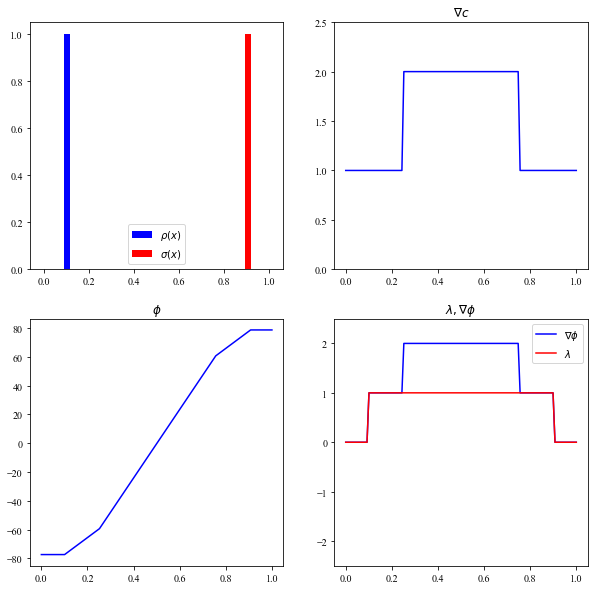

In [15]:
n = 20*6
h=1/(n-1)
x = np.linspace(0,1,n) 
# Initial Distribution
rho = np.zeros(n)
rho[n//10] = 1
# Final Distribution
sigma = np.zeros(n)
sigma[9*n // 10] = 1
#Gradient C
Gc = np.ones(n)
Gc[n//4:3*n//4]=2*np.ones(n//2)
#Solve
phi,Gphi,lam = FDM_krot(x,rho, sigma, Gc, vis=True)

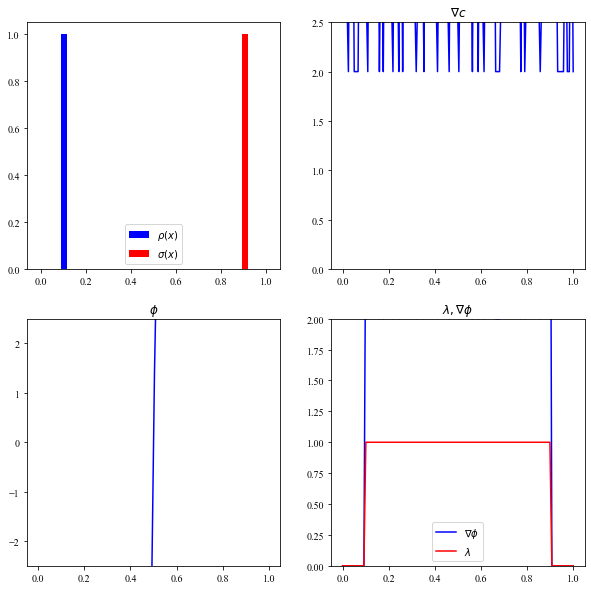

In [ ]:
n = 20*6
h=1/(n-1)
x = np.linspace(0,1,n) 
# Initial Distribution
rho = np.zeros(n)
rho[n//10] = 1
# Final Distribution
sigma = np.zeros(n)
sigma[9*n // 10] = 1
#Gradient C
Gc = np.random.randint(2,6,n)
#Solve
phi,Gphi,lam = FDM_krot(x,rho, sigma, Gc, vis=True)

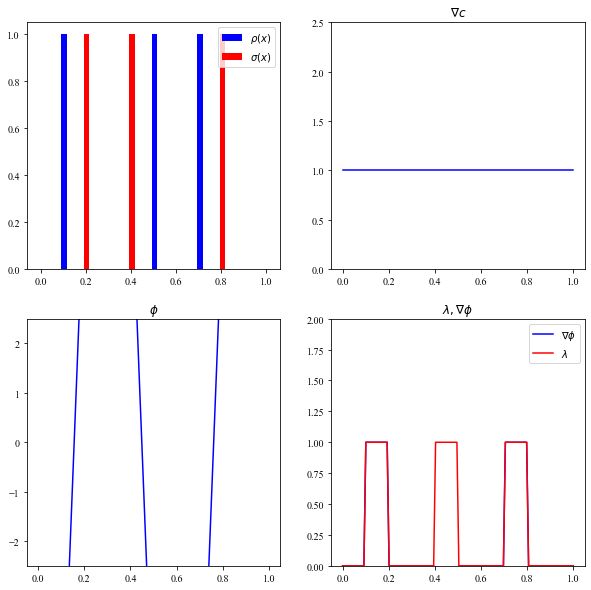

In [ ]:
n = 20*6
h=1/(n-1)
x = np.linspace(0,1,n) 
# Initial Distribution
rho = np.zeros(n)
rho[n//10] = 1
rho[5*n//10] = 1
rho[7*n//10] = 1

# Final Distribution
sigma = np.zeros(n)
sigma[8*n // 10] = 1
sigma[4*n // 10] = 1
sigma[2*n // 10] = 1
#Gradient C
Gc = np.ones(n)
#Solve
phi,Gphi,lam = FDM_krot(x,rho, sigma, Gc, vis=True)

## Two Dimensional Analogue

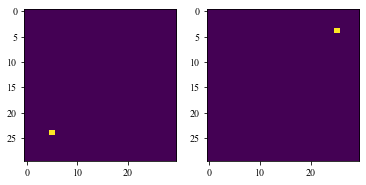

In [ ]:
n = 5*6
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
# Initial Distribution
rho = np.zeros((n,n))
rho[n//6,n//6] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[5*n // 6,5*n // 6] = 1
#Gradient C
lam = np.ones((n,n))
Gc = np.ones(n*n)

plt.subplot(121)
plt.imshow(rho[::-1])
plt.subplot(122)
plt.imshow(sigma[::-1])

In [ ]:
f = sigma.flatten()-rho.flatten()
Dx = D2xFE(n,n, bc = 'Neumann', matrix=True)/h
Dy = D2yFE(n,n, bc = 'Neumann', matrix=True)/h
A = np.hstack((Dx.T,Dy.T))

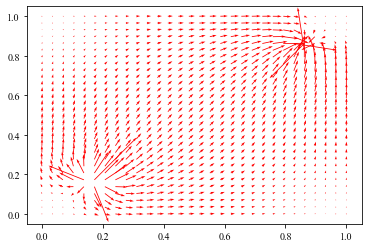

In [ ]:
lam_t = cp.Variable(n*n*2)
prob = cp.Problem(cp.Minimize(cp.sum_squares(A@lam_t-f)))
prob.solve()
lam_t = lam_t.value.reshape(2,n*n)
plt.quiver(xx,yy,lam_t[0],lam_t[1], color='r')
plt.show()

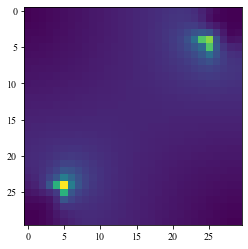

In [ ]:
lam = np.array([np.linalg.norm(_lam_t) for _lam_t in lam_t.reshape(2,n*n).T])
plt.imshow(lam.reshape(n,n)[::-1])
lam = np.diag(np.append(lam,lam))
lam_t = lam_t.reshape(2*n*n)

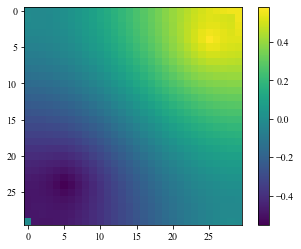

In [ ]:
G = np.vstack((Dx,Dy))
A = (lam@G)
phi = cp.Variable(n*n)
prob = cp.Problem(cp.Minimize(cp.sum_squares(A@phi-lam_t)))
prob.solve()
phi = phi.value.reshape(n,n)
plt.imshow(phi[::-1])
plt.colorbar()

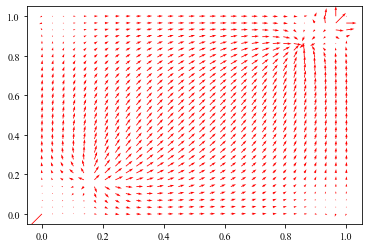

In [ ]:
Gphi = (G@phi.reshape(n*n)).reshape(2,n*n)
plt.quiver(xx,yy,Gphi[0], Gphi[1],color='r')

## Discussion